<a href="https://colab.research.google.com/github/labib2537/Data-Mining-and-ML/blob/main/DataMining_FinalLabProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
leaf_folder=r"/content/drive/MyDrive/Data Mining/Summer21/leaf_disease_data"
catagories=['Apple___healthy','Apple___scab']

In [4]:
IMAGE_SHAPE=(256,256)

data=[]
for Catagories in catagories:
  Folder=os.path.join(leaf_folder,Catagories)
  label=catagories.index(Catagories)
  for img in os.listdir(Folder):
    try:
        image=os.path.join(Folder,img)
        image_arr=cv2.imread(image)
        data.append([image_arr,label])
    except Exception as e:
        pass

In [5]:
import random
random.shuffle(data)

x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [7]:
model=models.Sequential([                
      #cnn layer 1
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=IMAGE_SHAPE+(3,)),
      layers.MaxPooling2D((2,2)),

      #cnn layer 2
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      #dense
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(2,activation='sigmoid')  
])

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(x_train, y_train,batch_size=10, epochs=5)

Epoch 1/5
150/150 [==============================] - 36s 26ms/step - loss: 0.7375 - accuracy: 0.8047
Epoch 2/5
150/150 [==============================] - 4s 26ms/step - loss: 0.1949 - accuracy: 0.9300
Epoch 3/5
150/150 [==============================] - 4s 26ms/step - loss: 0.1435 - accuracy: 0.9407
Epoch 4/5
150/150 [==============================] - 4s 26ms/step - loss: 0.1004 - accuracy: 0.9580
Epoch 5/5
150/150 [==============================] - 4s 26ms/step - loss: 0.1080 - accuracy: 0.9533


In [10]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 2s 52ms/step - loss: 0.4501 - accuracy: 0.8940


[0.4501029849052429, 0.8939999938011169]

In [11]:
y_pred=model.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test,y_pred_class))

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       258
           1       0.85      0.94      0.90       242

    accuracy                           0.89       500
   macro avg       0.90      0.90      0.89       500
weighted avg       0.90      0.89      0.89       500



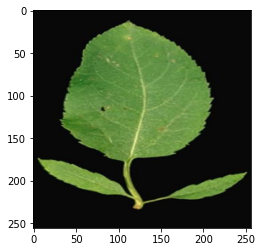

In [12]:
image=Image.open("/content/drive/MyDrive/Data Mining/download2.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)


In [13]:
plant_leafe=np.array(image)/255
plant_leafe=plant_leafe[np.newaxis, ...]

In [14]:
result=model.predict(plant_leafe)
Max_result=np.argmin(result)

image_labels=[]
with open("/content/drive/MyDrive/Data Mining/Summer21/leaf_disease_lebels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'Apple___healthy'